# **Análisis exploratorio y estadística**

# AE11 - CAPSTONE - Reconstrucción análisis 538 - Fandango

## <font color='blue'>**Contexto**</font>

__[FiveThirtyEight](https://fivethirtyeight.com/)__, a veces representado como __538__, es un sitio web estadounidense que se centra en el análisis de encuestas de opinión, la política, la economía y los blogs deportivos.

En octubre de 2015, publico un análisis que tituló "Be Suspicious Of Online Movie Ratings, Especially Fandango’s" (Sospeche de las clasificaciones de películas en línea, especialmente de Fandango), en el cual analizaba y cuestionaba el hecho que __la misma empresa__ (Fandango) tenía un __conflicto de interés__ al __publicar las calificaciones__ de las películas y __vender entradas__ al mismo tiempo.

<img src="https://drive.google.com/uc?export=view&id=1ErZN_tzjnzNRHjsPN-Ha2zpB_1_IU_6I" width='900'>


## <font color='blue'>**Preguntas de investigación**</font>
1. ¿Tienen Fandango alguna predisposición a calificar las películas por encima de lo que deberían calificar?
2. ¿Hay evidencias de conflicto de interés en un sitio web que nos entrega las calificaciones de las películas y que, además, nos vende entradas?


## <font color='blue'>**Misión**</font>
Su objetivo es completar las actividades a continuación basándose en el artículo __538__ mencionado, y ver si llega a una conclusión similar. Utilice los conocimientos adquiridos (`Pandas`, `Numpy`,`Malplotlib`, visualización y estadísticas) para determinar si las calificaciones de Fandango en 2015 tenían un sesgo hacia calificar mejor las películas para vender más boletos.



## <font color='blue'>__Ejercicios__</font>

### <font color='green'>**Actividad 1**</font>
### Investigación de los antecedentes y los datos


1. Lea el artículo: [Sospeche de las calificaciones de películas en línea, especialmente las de Fandango](http://fivethirtyeight.com/features/fandango-movies-ratings/)
2. Lea los datasets del estudio. Hay dos archivos csv, uno con las calificaciones de Fandango (`fandango_scrape.csv`), y el otro con datos agregados para clasificaciones de películas de otros sitios, como Metacritic, IMDB y Rotten Tomatoes (`all_sites_scores.csv`). Los datos de Fandango se extrajeron el 24 de agosto de 2015, y contienen al menos 3 valoraciones de usuarios por película.
3. Explore las características de ambos datasets.

__Descripción de all_sites_scores.csv__

Columna | Contenido
--- | -----------
FILM | La película analizada
RottenTomatoes | Rotten Tomatoes Tomatometer valoración para la película
RottenTomatoes_User | Rotten Tomatoes valoración de usuario para la película
Metacritic | Metacritic valoración para la película
Metacritic_User | Metacritic valoración de usuario para la película
IMDB | IMDb valoración de usuario para la película
Metacritic_user_vote_count | Número de votos de usuario que tuvo la película en Metacritic
IMDB_user_vote_count | Número de votos de usuario que tuvo la película en IMDb


__Descripción de fandango_scrape.csv__

Contiene todas las películas analizadas por el sitio __538__.

Columna | Contenido
--- | ---------
FILM | La película analizada
STARS | Valoración en estrellas presentada en Fandango.com
RATING |El valor de calificación de Fandango para la película, extraído del HTML de cada página. Esta es la puntuación media real que obtuvo la película.
VOTES | Cantidad de personas que habían revisado la película en el momento en que la sacamos.

In [ ]:
# Tu código aquí ...
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Leemos los archivos
fandango = pd.read_csv("/content/drive/MyDrive/DATA SCIENCE UDD 2024/MODULO 3/fandango_scrape.csv")
all_sites = pd.read_csv("/content/drive/MyDrive/DATA SCIENCE UDD 2024/MODULO 3/all_sites_scores.csv")

In [ ]:
print(fandango.info())
fandango.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    504 non-null    object 
 1   STARS   504 non-null    float64
 2   RATING  504 non-null    float64
 3   VOTES   504 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 15.9+ KB
None


,STARS,RATING,VOTES
count,504.000000,504.000000,504.000000
mean,3.558532,3.375794,1147.863095
std,1.563133,1.491223,3830.583136
min,0.000000,0.000000,0.000000
25%,3.500000,3.100000,3.000000
50%,4.000000,3.800000,18.500000
75%,4.500000,4.300000,189.750000
max,5.000000,5.000000,34846.000000


In [ ]:
all_sites.info()
all_sites.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        146 non-null    object 
 1   RottenTomatoes              146 non-null    int64  
 2   RottenTomatoes_User         146 non-null    int64  
 3   Metacritic                  146 non-null    int64  
 4   Metacritic_User             146 non-null    float64
 5   IMDB                        146 non-null    float64
 6   Metacritic_user_vote_count  146 non-null    int64  
 7   IMDB_user_vote_count        146 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 9.2+ KB


,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,60.849315,63.876712,58.808219,6.519178,6.736986,185.705479,42846.205479
std,30.168799,20.024430,19.517389,1.510712,0.958736,316.606515,67406.509171
min,5.000000,20.000000,13.000000,2.400000,4.000000,4.000000,243.000000
25%,31.250000,50.000000,43.500000,5.700000,6.300000,33.250000,5627.000000
50%,63.500000,66.500000,59.000000,6.850000,6.900000,72.500000,19103.000000
75%,89.000000,81.000000,75.000000,7.500000,7.400000,168.500000,45185.750000
max,100.000000,94.000000,94.000000,9.600000,8.600000,2375.000000,334164.000000


<font color='green'>Fin actividad 1</font>

### <font color='green'>**Actividad 2**</font>

### Explorando las valoraciones mostradas en Fandango frente a las puntuaciones reales de los usuarios

Exploremos las calificaciones de Fandango para ver si nuestro análisis está de acuerdo con la conclusión del artículo.

1. Explore la relación entre la popularidad de una película y su calificación. Cree un diagrama de dispersión que muestre la relación entre la calificación y los votos.
2. Calcule la correlación entre las distintas variables y visualícelas.
3. Calcule cuántas películas hay en Fandango por año y visualice.
4. Cuáles son las 10 películas con más votaciones?
5. Cuántas películas tienen cero votos?
6. Cree un nuevo DataFrame con las películas que tienen al menos un voto



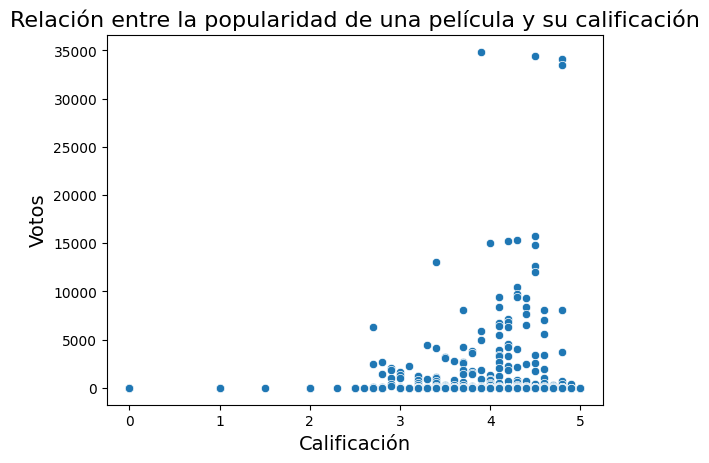

In [ ]:
# Tu código aquí ...
# 1. Relación entre la popularidad de una película y su calificación
sns.scatterplot(data=fandango, x='RATING', y='VOTES')
plt.title('Relación entre la popularidad de una película y su calificación', fontsize=16)
plt.xlabel('Calificación', fontsize=14)
plt.ylabel('Votos', fontsize=14)
plt.show()

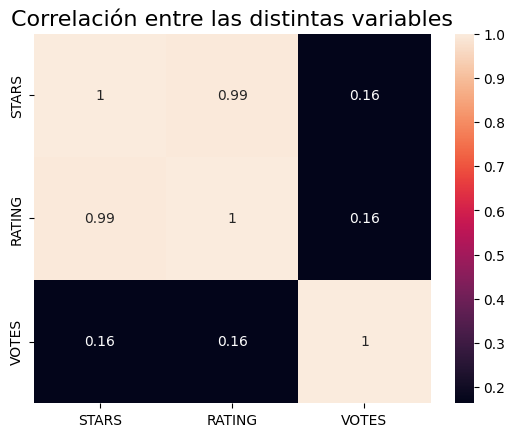

In [ ]:
# 2. Correlación entre las distintas variables
corr = fandango.corr(numeric_only=True)
sns.heatmap(corr, annot=True)
plt.title('Correlación entre las distintas variables', fontsize=16)
plt.show()

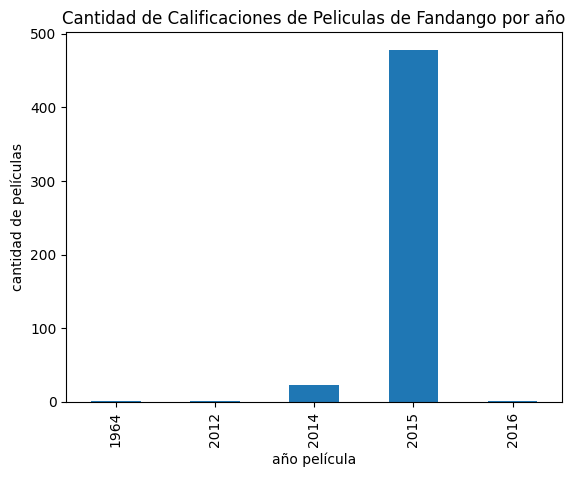

In [ ]:
# 3. Calcule cuántas películas hay en Fandango por año y visualice.
by_year = fandango.groupby(fandango['FILM'].str[-5:-1].astype(int))
by_year['FILM'].count().plot(kind='bar', title='Cantidad de Calificaciones de Peliculas de Fandango por año', xlabel='año película', ylabel='cantidad de películas', sharey=True)
plt.show()

In [ ]:
# 4. Las 10 películas con más votos
fandango.sort_values(by='VOTES', ascending=False).head(10)

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337
6,Kingsman: The Secret Service (2015),4.5,4.2,15205
7,Minions (2015),4.0,4.0,14998
8,Avengers: Age of Ultron (2015),5.0,4.5,14846
9,Into the Woods (2014),3.5,3.4,13055


In [ ]:
# 5. Cuántas películas tienen cero votos
fandango[fandango['VOTES'] == 0].shape[0]

69

In [ ]:
# 6. Creamos una nuevo DataFrame con las películas con al menos una valoración
fandango_no_zeros = fandango[fandango['VOTES'] > 0]
fandango_no_zeros.info()

<class 'pandas.core.frame.DataFrame'>
Index: 435 entries, 0 to 434
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    435 non-null    object 
 1   STARS   435 non-null    float64
 2   RATING  435 non-null    float64
 3   VOTES   435 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 17.0+ KB


<font color='green'>Fin actividad 2</font>

### <font color='green'>**Actividad 3**</font>

En un sistema de redondeo normal, un sitio redondearía a la media estrella de valoración más cercana, hacia arriba o hacia abajo. Como se indica en el artículo, el sistema de redondeo de Fandango, y a modo de ejemplo, en el caso de "Ted 2", esperaríamos que la calificación se redondeara a 4 estrellas (dado que la valoración es de usuarios es 4.1). Sin embargo, Fandango redondeó el "ratingValue" hacia arriba, hasta un 4.5. Esto nos demuestra que la calificación real del usuario puede ser ligeramente diferente a la calificación que se le muestra a un usuario en el sitio web.
Visualice esta diferencia en distribuciones.

1. Verifique con gráficos KDE rellenos si las distribuciones de las calificaciones que se muestran (STARS) son distintas a la calificación real de los votos (RATING). Tip: recorte los KDE a 0-5 con
`clip=[0,5]`

2. Si es que en el punto anterior hay una diferencia, cuantifíquela y añádala en una nueva columna del DataFrame. Esta nueva columna debe quedar expresada con un decimal.

3. Grafique la cantidad de veces que cada diferencia (0.1, 0.2, 0.3, etc.) se produce.

4. ¿Qué película(s) tiene(n) un diferencial de más de media estrella?

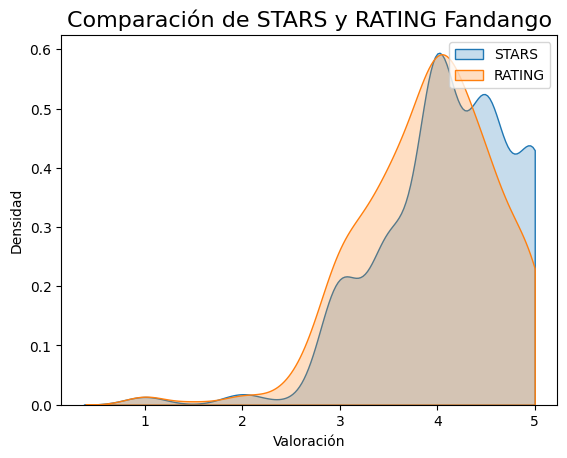

In [ ]:
# Tu código aquí ...
# 1. Comparamos los KDEs
sns.kdeplot(data=fandango_no_zeros, x='STARS',clip=[0,5], fill=True)
sns.kdeplot(data=fandango_no_zeros, x='RATING',clip=[0,5], fill=True)
plt.title('Comparación de STARS y RATING Fandango', fontsize=16)
plt.legend(['STARS', 'RATING'])
plt.xlabel('Valoración')
plt.ylabel('Densidad')
plt.show()

El resultado es el mismo del artículo:

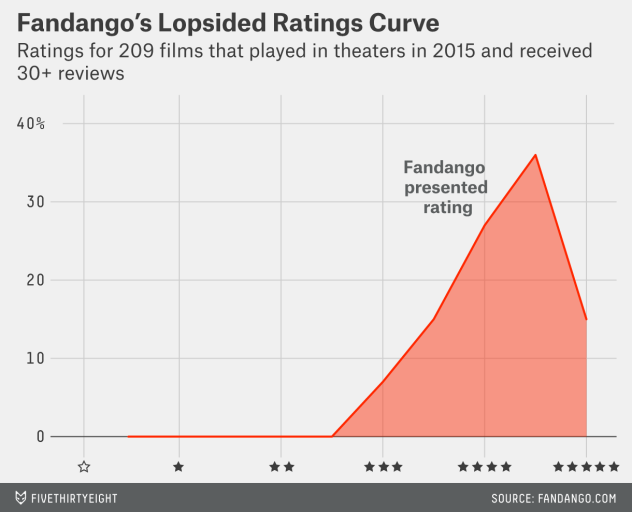

In [ ]:
# 2. Cuantifiquemos ahora realmente esta discrepancia.
fandango_no_zeros['DIFERENCIA'] = round(fandango_no_zeros['STARS'] - fandango_no_zeros['RATING'], 1)
fandango_no_zeros.head()

<ipython-input-65-ddb38675a0e3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fandango_no_zeros['DIFERENCIA'] = round(fandango_no_zeros['STARS'] - fandango_no_zeros['RATING'], 1)


,FILM,STARS,RATING,VOTES,DIFERENCIA
0,Fifty Shades of Grey (2015),4.0,3.9,34846,0.1
1,Jurassic World (2015),4.5,4.5,34390,0.0
2,American Sniper (2015),5.0,4.8,34085,0.2
3,Furious 7 (2015),5.0,4.8,33538,0.2
4,Inside Out (2015),4.5,4.5,15749,0.0


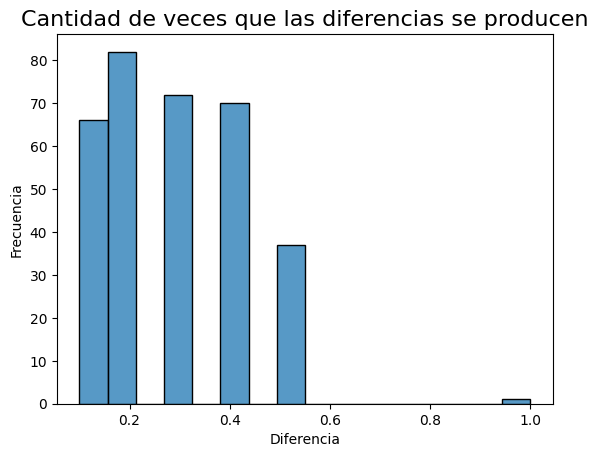

In [ ]:
# 3. Cantidad de veces que las diferencias se producen.
sns.histplot(data=fandango_no_zeros[fandango_no_zeros['DIFERENCIA']>0], x='DIFERENCIA')
plt.title('Cantidad de veces que las diferencias se producen', fontsize=16)
plt.xlabel('Diferencia')
plt.ylabel('Frecuencia')
plt.show()

In [ ]:
# 4. Buscamos la pelicula con una diferencia de una estrella
i = fandango_no_zeros[fandango_no_zeros['DIFERENCIA'] == 1]
print(i.iloc[0])

FILM          Turbo Kid (2015)
STARS                      5.0
RATING                     4.0
VOTES                        2
DIFERENCIA                 1.0
Name: 381, dtype: object


<font color='green'>Fin actividad 3</font>

### <font color='green'>**Actividad 4**</font>
## Comparación de las valoraciones de Fandango con Rotten Tomatoes

Compare las valoraciones de Fandango con la de __Rotten Tomatoes__. Analice y comente las diferencias.

1. Analice __Rotten Tomatoes__ (__RT__). Observe cómo el sitio tiene dos valoraciones; una de críticos especializados y otra de usuarios. Realice una visualización de dispersión de ambas variables.

2. Determine la diferencia comparando las calificaciones de los críticos y las calificaciones de los usuarios de __RT__. Cree una nueva columna basada en la diferencia entre las calificaciones de los críticos y las calificaciones de los usuarios para Rotten Tomatoes. Calcule esto con `RottenTomatoes - RottenTomatoes_User`

3. Calcule la diferencia media absoluta obtenida en el punto 2. Atención con los valores negativos.

4. Visualice con 2 subplots horizontales:
  * La distribución de las diferencias entre `RT Critics Score` y `RT User Score`. Debe haber valores negativos en esta gráfica de distribución. Utilice KDE e histogramas para mostrar esta distribución.
  * La distribución que muestre la diferencia en valor absoluto.
  * Incluya un título a cada subplot y un título general a nivel del lienzo (figure).

5. ¿Cuáles son las 10 películas más valoradas por los usuarios en promedio que los críticos? Y ¿Cuáles son las 10 películas con mejores valoraciones de críticos de películas que de usuarios?

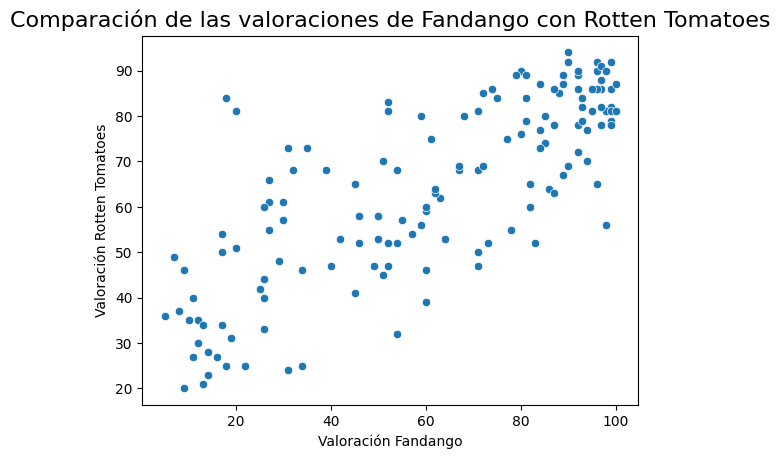

In [ ]:
# Tu código aquí ...

# 1. Dispersión de RT
sns.scatterplot(data=all_sites, x='RottenTomatoes', y='RottenTomatoes_User')
plt.title('Comparación de las valoraciones de Fandango con Rotten Tomatoes', fontsize=16)
plt.xlabel('Valoración Fandango')
plt.ylabel('Valoración Rotten Tomatoes')
plt.show()

In [ ]:
# 2. Rotten_Diff =  Critics - User Score.
all_sites['Rotten_Diff'] = all_sites['RottenTomatoes'] - all_sites['RottenTomatoes_User']
all_sites.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107,-12
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709,5
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660,-10
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136,-66
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560,-14


In [ ]:
# 3. Diferencia media absoluta
i = round(all_sites['Rotten_Diff'].abs().mean(),3)
print(f"La diferencia media absoluta es: {i}")

La diferencia media absoluta es: 15.096


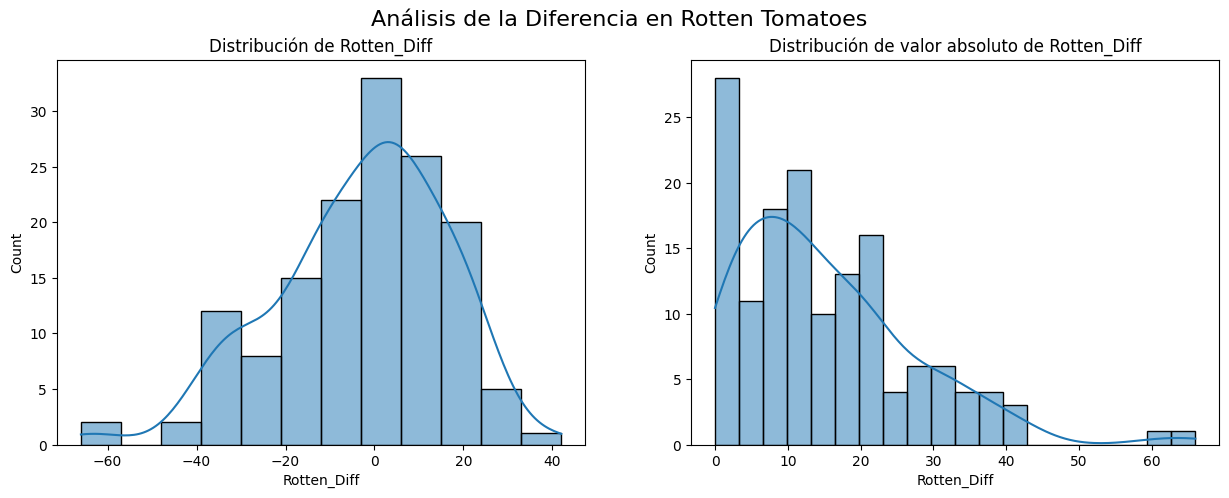

In [ ]:
# 4. Visualización de la distribución de las diferencias y del valor absoluto de las diferencias
fig, axes = plt.subplots(1,2, figsize=(15,5))
sns.histplot(all_sites['Rotten_Diff'], kde=True, ax=axes[0])
axes[0].set_title('Distribución de Rotten_Diff')
sns.histplot(all_sites['Rotten_Diff'].abs(), kde=True, bins=20, ax=axes[1])
axes[1].set_title('Distribución de valor absoluto de Rotten_Diff')
fig.suptitle('Análisis de la Diferencia en Rotten Tomatoes', fontsize=16)
plt.show()


In [ ]:
# 5. Las 10 películas más valoradas por los usuarios en promedio que los críticos
# top 10 peliculas donde valoracion usuario es mayor a valoracion críticos:
top10_rt_user = all_sites[all_sites['Rotten_Diff'] < 0].sort_values(by='RottenTomatoes_User', ascending=False).head(10).reset_index(drop=True)
top10_rt_user


,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
0,Straight Outta Compton (2015),90,94,72,7.3,8.4,90,15982,-4
1,The Imitation Game (2014),90,92,73,8.2,8.1,566,334164,-2
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660,-10
3,"McFarland, USA (2015)",79,89,60,7.2,7.5,59,13769,-10
4,Me and Earl and The Dying Girl (2015),81,89,74,8.4,8.2,41,5269,-8
5,The Stanford Prison Experiment (2015),84,87,68,8.5,7.1,6,950,-3
6,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107,-12
7,American Sniper (2015),72,85,72,6.6,7.4,850,251856,-13
8,Furious 7 (2015),81,84,67,6.8,7.4,764,207211,-3
9,Kingsman: The Secret Service (2015),75,84,58,7.9,7.8,1054,272204,-9


In [ ]:
# Las 10 películas con mejores valoraciones de críticos de películas que de usuarios
# top 10 peliculas donde valoracion de criticos es mayor a valoracion de usuarios:
top10_rt_critic = all_sites[all_sites['Rotten_Diff'] > 0].sort_values(by='RottenTomatoes', ascending=False).head(10).reset_index(drop=True)
top10_rt_critic

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
0,Seymour: An Introduction (2015),100,87,83,6.0,7.7,4,243,13
1,Gett: The Trial of Viviane Amsalem (2015),100,81,90,7.3,7.8,19,1955,19
2,Selma (2014),99,86,89,7.1,7.5,316,45344,13
3,Leviathan (2014),99,79,92,7.2,7.7,145,22521,20
4,Song of the Sea (2014),99,92,86,8.2,8.2,62,14067,7
5,Timbuktu (2015),99,78,91,6.9,7.2,37,6246,21
6,Phoenix (2015),99,81,91,8.0,7.2,21,3687,18
7,Shaun the Sheep Movie (2015),99,82,81,8.8,7.4,62,12227,17
8,Inside Out (2015),98,90,94,8.9,8.6,807,96252,8
9,Mr. Turner (2014),98,56,94,6.6,6.9,98,13296,42


<font color='green'>Fin actividad 4</font>

### <font color='green'>**Actividad 5**</font>
## Comparación de las valoraciones de Fandango con MetaCritic

Ahora echemos un vistazo a las calificaciones de __MetaCritic__. Metacritic también muestra una calificación de usuario promedio en comparación con su calificación oficial mostrada.

1. Realice una visualización de dispersión de ambas variables.

2. Determine la diferencia comparando las calificaciones de los críticos y las calificaciones de los usuarios de __RT__. De forma similar a la __Actividad 4__ cree una nueva columna basada en la diferencia entre las calificaciones de los críticos y las calificaciones de los usuarios para MetaCritic. Calcule esto con `Metacritic - Metacritic_User`

3. Visualice las comparación de diferencias de __RT__ con las de __MetaCritic__.

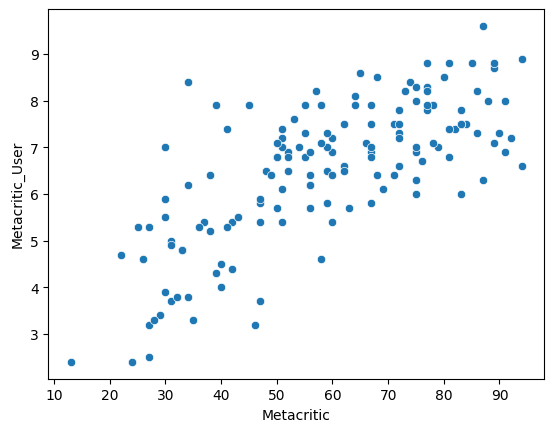

In [ ]:
# Tu código aquí ...
# 1. Visualización de dispersión (scatter) entre la crítica oficial y la de los usuarios
sns.scatterplot(data=all_sites, x='Metacritic', y='Metacritic_User')
plt.show()

In [ ]:
# 2. Metacritic_Diff =  Criticos - Usuarios
all_sites['Metacritic_Diff'] = all_sites['Metacritic'] - all_sites['Metacritic_User']
all_sites.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff,Metacritic_Diff
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107,-12,58.9
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709,5,59.5
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660,-10,55.9
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136,-66,17.3
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560,-14,25.6


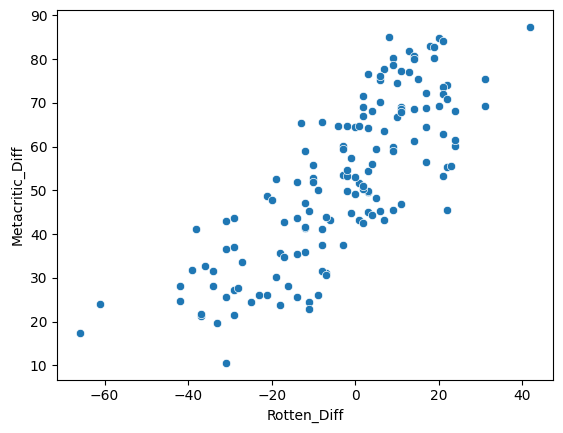

In [ ]:
# 3. Dispersión de diferencias
sns.scatterplot(data=all_sites, x='Rotten_Diff', y='Metacritic_Diff')
plt.show()

<font color='green'>Fin actividad 5</font>

## <font color='purple'>__Material adicional__</font>


A continuación revisaremos la documentación del clustermap de Seaborn:
- [Seaborn Clustermap](https://seaborn.pydata.org/generated/seaborn.clustermap.html)

El clustermap de Seaborn es una herramienta poderosa para visualizar datos en forma de matriz, combinando un mapa de calor con un dendrograma que muestra la agrupación jerárquica de las filas y columnas. Acá explicaremos los elementos principales:
1. Ejes y Dendrogramas
Ejes: En un clustermap, los ejes representan las variables (columnas) y las observaciones (filas) de los datos. Cada celda en el mapa de calor muestra el valor correspondiente a la intersección de una fila y una columna.
Dendrogramas: A la izquierda y arriba del clustermap, verás dendrogramas que representan la agrupación jerárquica. Estos dendrogramas muestran cómo se agrupan las filas y columnas en función de su similitud. Las ramas más cortas indican que los elementos son más similares entre sí.
2. Mapa de Calor
El mapa de calor visualiza los valores de la matriz con colores, donde cada color representa un rango específico de valores. Los colores pueden ser ajustados usando el argumento cmap para elegir una paleta que facilite la interpretación.
La intensidad del color en cada celda indica la magnitud del valor: colores más oscuros o brillantes pueden indicar valores más altos o más bajos, dependiendo de la paleta utilizada.
3. Agrupación y Similitud
Al observar el clustermap, puedes identificar patrones en los datos basados en cómo están agrupadas las filas y columnas. Por ejemplo, si varias filas están agrupadas juntas, esto sugiere que tienen características similares.
Los grupos identificados pueden ser útiles para segmentar datos o realizar análisis adicionales.
4. Personalización
Puedes personalizar el clustermap ajustando varios parámetros:
method: Define el método de agrupamiento (por ejemplo, "ward", "average").
metric: Especifica la métrica de distancia utilizada para calcular similitudes (por ejemplo, "euclidean", "correlation").
standard_scale: Permite estandarizar los datos por filas o columnas antes del agrupamiento.
figsize: Ajusta el tamaño total del gráfico.

### <font color='purple'>Fin material adicional </font>

### <font color='green'>**Actividad 6**</font>
## Comparación de valoraciones de Fandago vs. All Sites

Explore si Fandango muestra artificialmente calificaciones más altas que las justificadas para impulsar la venta de boletos.

1. Combine ambos datasets (`Fandango` con `All_Sites`). ¿Cuántos registros se pierden en la fusión?
2. Normalice las columnas para que sus escalas sean comparables. Fandango utiliza una escala de $0-5$ para `STARS` y `RATINGS`.
3. Simplifique el DataFrame. Genere una copia con las valoraciones normalizadas. Incluya `STARS`y `RATING` desde Fandango.
4. Compare de la distribución de puntuaciones entre sitios. ¿Fandango muestra calificaciones anormalmente altas? Ya sabemos que su `RATIBG` mostrado es más alto que las valoraciones de usuarios (`STARS`), pero ¿son las calificaciones en sí mismas más altas que el promedio? Analice y comente.
5. Cree una gráfica `hisplot` comparando todas las puntuaciones normalizadas.
6. ¿Cómo se califican las peores películas en todos los sitios? Cree una visualización del tipo `clustermap` de todas las puntuaciones normalizadas. Investigue acerca de esta gráfica avanzada de `Seaborn`.
7. Según las calificaciones de los críticos de __RT__, ¿cuáles son las 10 películas con las calificaciones más bajas? ¿Cuáles son las puntuaciones normalizadas en los otros sitios para estas películas?

In [ ]:
# Tu código aquí ...
# 1. Merge de ambos datasets
# No todas las películas de la tabla Fandango están en la tabla All_Sites
# algunas películas de Fandango tienen muy pocas críticas o ninguna.
# Solo queremos comparar películas que están en ambos DataFrames,
merged = fandango.merge(all_sites, on='FILM', how='inner')
merged

,FILM,STARS,RATING,VOTES,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff,Metacritic_Diff
0,Fifty Shades of Grey (2015),4.0,3.9,34846,25,42,46,3.2,4.2,778,179506,-17,42.8
1,Jurassic World (2015),4.5,4.5,34390,71,81,59,7.0,7.3,1281,241807,-10,52.0
2,American Sniper (2015),5.0,4.8,34085,72,85,72,6.6,7.4,850,251856,-13,65.4
3,Furious 7 (2015),5.0,4.8,33538,81,84,67,6.8,7.4,764,207211,-3,60.2
4,Inside Out (2015),4.5,4.5,15749,98,90,94,8.9,8.6,807,96252,8,85.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,"Kumiko, The Treasure Hunter (2015)",3.5,3.5,41,87,63,68,6.4,6.7,19,5289,24,61.6
141,The Diary of a Teenage Girl (2015),4.0,3.6,38,95,81,87,6.3,7.0,18,1107,14,80.7
142,The Wrecking Crew (2015),4.5,4.2,38,93,84,67,7.0,7.8,4,732,9,60.0
143,Tangerine (2015),4.0,3.9,36,95,86,86,7.3,7.4,14,696,9,78.7


Tenga en cuenta que RT, Metacritic e IMDB no usan una puntuación entre 0-5 estrellas como lo hace Fandango. Para hacer una comparación justa, necesitamos * normalizar * estos valores para que todos caigan entre 0 y 5 estrellas y la relación entre las reseñas se mantenga igual.


Tips:
1. https://stackoverflow.com/questions/26414913/normalize-columns-of-pandas-data-frame

2. Otra forma simple de normalizar es dividiendo las escalas para asemejarlas a la de Fandango.
  * 100/20 = 5
  * 10/2 = 5

In [ ]:
# 2. Normalización de las valoraciones
# funcion para normalizar de acuerdo a valor minimo y maximo
def normalize_to_5(x):
    min_val = 0
    max_val = x.max()
    return round((x - min_val) / (max_val - min_val) * 5, 1)

# Normalizar las columnas
merged['RottenTomatoes'] = normalize_to_5(merged['RottenTomatoes'])
merged['RottenTomatoes_User'] = normalize_to_5(merged['RottenTomatoes_User'])
merged['Metacritic'] = normalize_to_5(merged['Metacritic'])
merged['Metacritic_User'] = normalize_to_5(merged['Metacritic_User'])
merged['IMDB'] = normalize_to_5(merged['IMDB'])
merged

,FILM,STARS,RATING,VOTES,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff,Metacritic_Diff
0,Fifty Shades of Grey (2015),4.0,3.9,34846,1.2,2.2,2.4,1.7,2.4,778,179506,-17,42.8
1,Jurassic World (2015),4.5,4.5,34390,3.6,4.3,3.1,3.6,4.2,1281,241807,-10,52.0
2,American Sniper (2015),5.0,4.8,34085,3.6,4.5,3.8,3.4,4.3,850,251856,-13,65.4
3,Furious 7 (2015),5.0,4.8,33538,4.1,4.5,3.6,3.5,4.3,764,207211,-3,60.2
4,Inside Out (2015),4.5,4.5,15749,4.9,4.8,5.0,4.6,5.0,807,96252,8,85.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,"Kumiko, The Treasure Hunter (2015)",3.5,3.5,41,4.4,3.4,3.6,3.3,3.9,19,5289,24,61.6
141,The Diary of a Teenage Girl (2015),4.0,3.6,38,4.8,4.3,4.6,3.3,4.1,18,1107,14,80.7
142,The Wrecking Crew (2015),4.5,4.2,38,4.6,4.5,3.6,3.6,4.5,4,732,9,60.0
143,Tangerine (2015),4.0,3.9,36,4.8,4.6,4.6,3.8,4.3,14,696,9,78.7


In [ ]:
# 3. Simplificación del DataFrame
normalized = merged[['FILM', 'STARS', 'RATING', 'RottenTomatoes', 'RottenTomatoes_User', 'Metacritic', 'Metacritic_User', 'IMDB']].copy()
normalized


,FILM,STARS,RATING,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB
0,Fifty Shades of Grey (2015),4.0,3.9,1.2,2.2,2.4,1.7,2.4
1,Jurassic World (2015),4.5,4.5,3.6,4.3,3.1,3.6,4.2
2,American Sniper (2015),5.0,4.8,3.6,4.5,3.8,3.4,4.3
3,Furious 7 (2015),5.0,4.8,4.1,4.5,3.6,3.5,4.3
4,Inside Out (2015),4.5,4.5,4.9,4.8,5.0,4.6,5.0
...,...,...,...,...,...,...,...,...
140,"Kumiko, The Treasure Hunter (2015)",3.5,3.5,4.4,3.4,3.6,3.3,3.9
141,The Diary of a Teenage Girl (2015),4.0,3.6,4.8,4.3,4.6,3.3,4.1
142,The Wrecking Crew (2015),4.5,4.2,4.6,4.5,3.6,3.6,4.5
143,Tangerine (2015),4.0,3.9,4.8,4.6,4.6,3.8,4.3


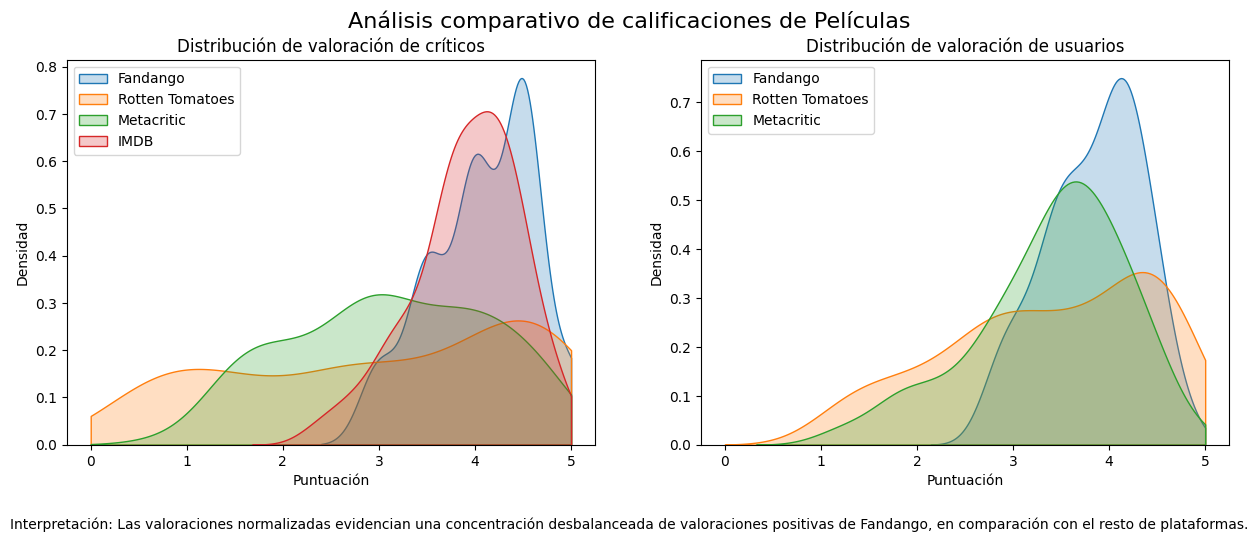

In [ ]:
# 4. Comparando distribuciones de valoraciones
fig, axes = plt.subplots(1,2, figsize=(15,5))
fig.suptitle('Análisis comparativo de calificaciones de Películas', fontsize=16)
sns.kdeplot(data=normalized, x='STARS',clip=[0,5], fill=True, ax=axes[0])
sns.kdeplot(data=normalized, x='RottenTomatoes',clip=[0,5], fill=True, ax=axes[0])
sns.kdeplot(data=normalized, x='Metacritic',clip=[0,5], fill=True, ax=axes[0])
sns.kdeplot(data=normalized, x='IMDB',clip=[0,5], fill=True, ax=axes[0])
axes[0].set_title('Distribución de valoración de críticos')
axes[0].legend(['Fandango', 'Rotten Tomatoes', 'Metacritic', 'IMDB'],loc='upper left')
axes[0].set_xlabel('Puntuación')
axes[0].set_ylabel('Densidad')
sns.kdeplot(data=normalized, x='RATING',clip=[0,5], fill=True, ax=axes[1])
sns.kdeplot(data=normalized, x='RottenTomatoes_User',clip=[0,5], fill=True, ax=axes[1])
sns.kdeplot(data=normalized, x='Metacritic_User',clip=[0,5], fill=True, ax=axes[1])
axes[1].legend(['Fandango', 'Rotten Tomatoes', 'Metacritic'],loc='upper left')
axes[1].set_title('Distribución de valoración de usuarios')
axes[1].set_xlabel('Puntuación')
axes[1].set_ylabel('Densidad')
plt.figtext(0.5, -0.05, "Interpretación: Las valoraciones normalizadas evidencian una concentración desbalanceada de valoraciones positivas de Fandango, en comparación con el resto de plataformas.",
             ha='center', va='center', fontsize=10)
plt.show()

Está clara la similitud con nuestros resultados de las valoraciones de los usuarios:

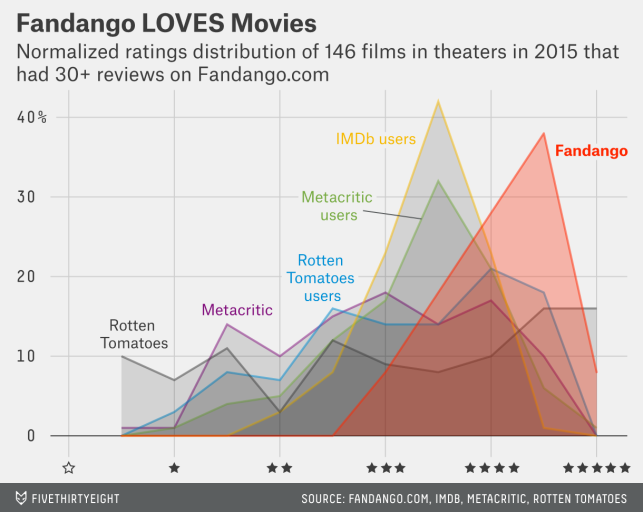

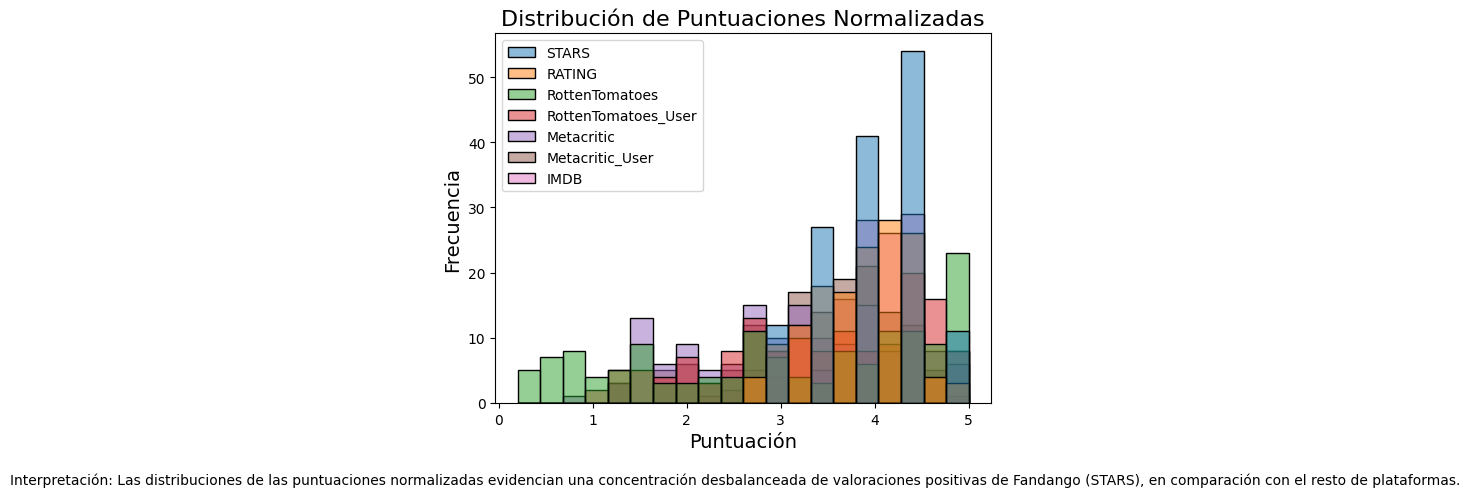

In [ ]:
# 5. Hisplot comparando todas las puntuaciones normalizadas.

sns.histplot(data=normalized, bins=20)
plt.title('Distribución de Puntuaciones Normalizadas', fontsize=16)
plt.xlabel('Puntuación', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)
plt.figtext(0.5, -0.05, "Interpretación: Las distribuciones de las puntuaciones normalizadas evidencian una concentración desbalanceada de valoraciones positivas de Fandango (STARS), en comparación con el resto de plataformas.",
             ha='center', va='center', fontsize=10)
plt.show()

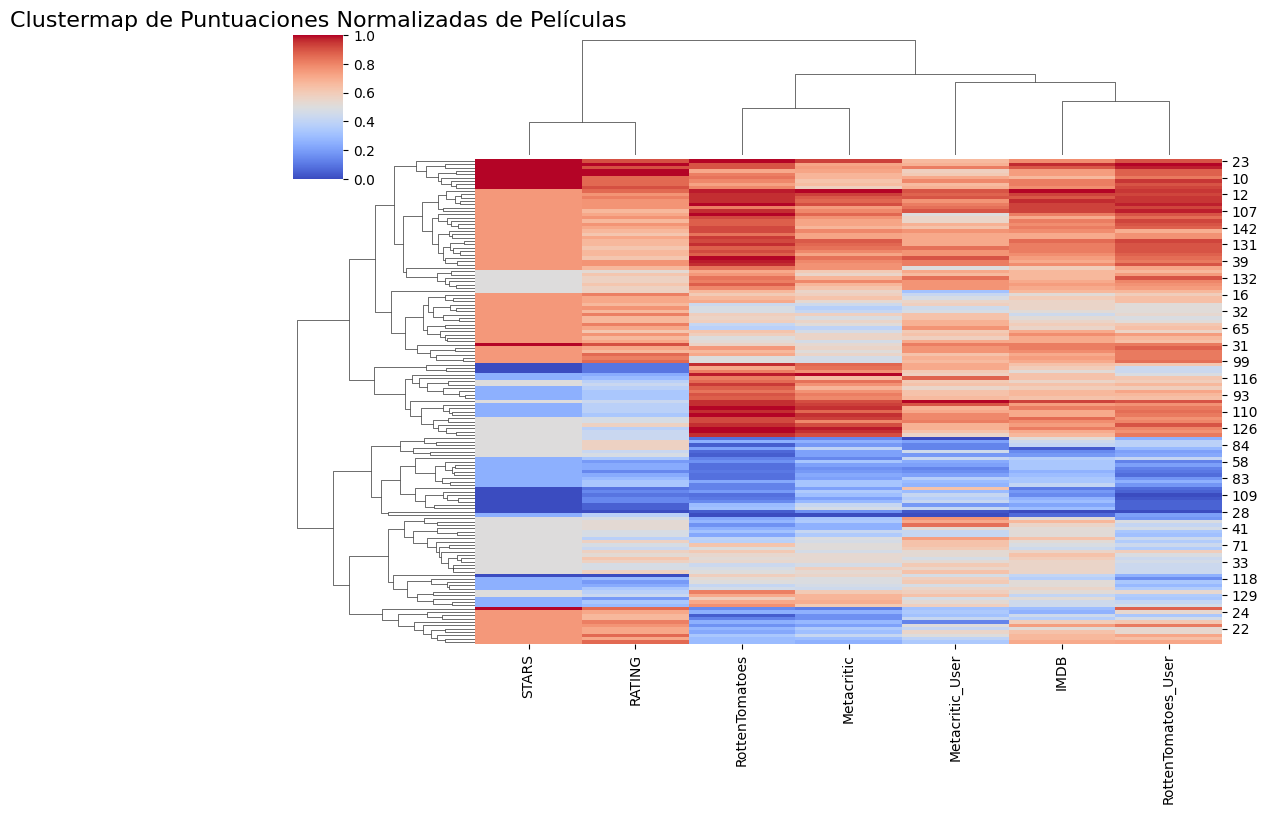

In [ ]:
# 6. clustermap
# Las películas de alta calificación
# deben agruparse en comparación con las películas de baja calificación.


# Seleccionar solo las columnas relevantes para el clustermap
data_for_clustermap = normalized[['STARS', 'RottenTomatoes', 'Metacritic', 'IMDB', 'RATING', 'RottenTomatoes_User', 'Metacritic_User']]

# Crear el clustermap
sns.clustermap(data_for_clustermap, cmap='coolwarm', standard_scale=1,row_cluster=True, figsize=(10, 8))

# Agregar título
plt.title('Clustermap de Puntuaciones Normalizadas de Películas', fontsize=16)
plt.show()

Se observa como ambas puntuaciones de fandango (STARS y RATING) se encuentran agrupadas aparte de las de las otras plataformas, y de entre esas dos variables la de STARS muestra una homogeneidad que difícilmente se explica sin una manipulación un tanto generalizada de los datos.

In [ ]:
# 7. Examinemos las 10 peores películas.
worst10 = normalized.sort_values(by='RottenTomatoes', ascending=True).head(10).reset_index(drop=True)
print("Las 10 peores películas según RT son:")
worst10

Las 10 peores películas según RT son:


,FILM,STARS,RATING,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB
0,Paul Blart: Mall Cop 2 (2015),3.5,3.5,0.2,1.9,0.7,1.2,2.5
1,Taken 3 (2015),4.5,4.1,0.4,2.4,1.4,2.4,3.5
2,Fantastic Four (2015),3.0,2.7,0.4,1.1,1.4,1.3,2.3
3,Hitman: Agent 47 (2015),4.0,3.9,0.4,2.6,1.5,1.7,3.4
4,Hot Pursuit (2015),4.0,3.7,0.4,2.0,1.6,1.9,2.8
5,The Boy Next Door (2015),4.0,3.6,0.5,1.9,1.6,2.9,2.7
6,The Vatican Tapes (2015),3.0,2.9,0.6,1.1,2.0,2.8,2.7
7,The Loft (2015),4.0,3.6,0.6,2.1,1.3,1.2,3.7
8,Unfinished Business (2015),3.5,3.2,0.6,1.4,1.7,2.0,3.1
9,Sinister 2 (2015),3.5,3.3,0.6,1.8,1.6,2.6,3.2


<font color='green'>Fin actividad 6</font>

# Conclusiones

Obtuvimos las mismas conclusiones que FiveThirtyEight:

1. Las calificaciones mostradas a menudo se redondeaban hacia arriba: Fandango mostraba calificaciones en estrellas enteras o medias estrellas, pero las calificaciones promedio reales de los usuarios a menudo eran más bajas y no se redondeaban hacia arriba.

2. La diferencia entre las calificaciones mostradas y las reales era mayor para las películas mejor calificadas: Esto sugiere que Fandango puede haber sido más propenso a inflar las calificaciones de las películas que ya eran populares.


3. Las calificaciones de Fandango eran más altas que las calificaciones de otros sitios.